## **Project Overview**

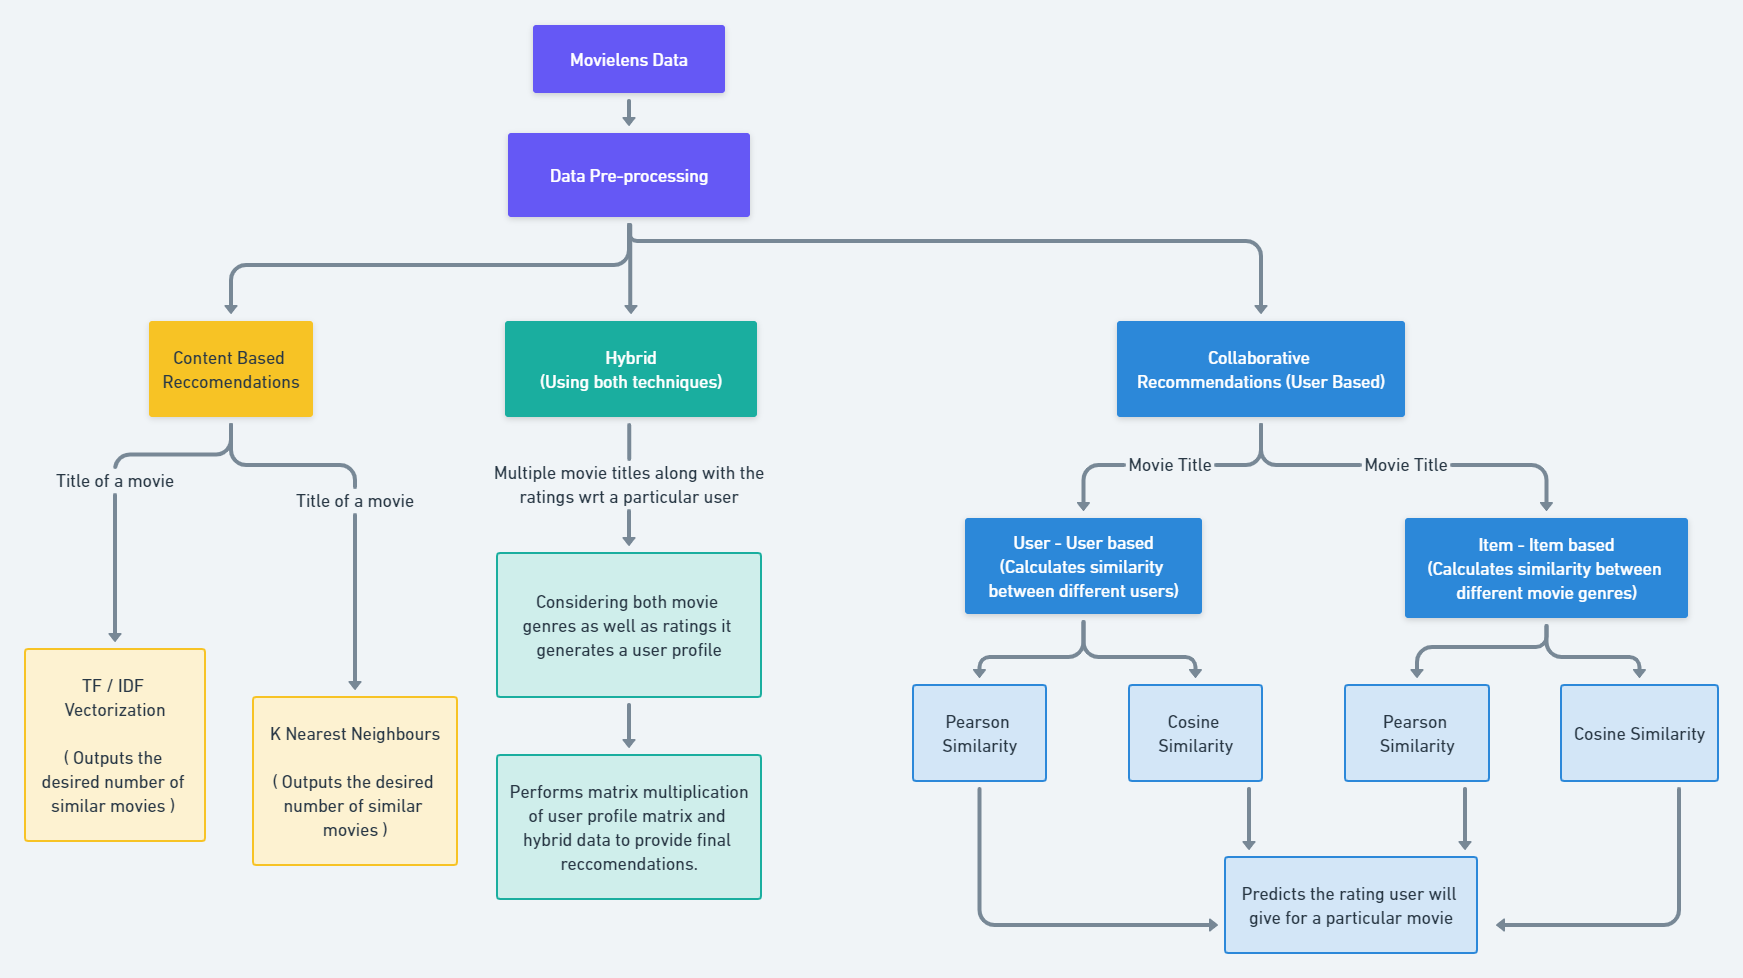

In [ ]:
from IPython.display import Image
Image(filename='/content/Project_Overview.png') 

## **User-User Collaborative Filtering using Nearest Neighbours**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing all the necessary data files.
links = pd.read_csv('/content/links.csv')
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')

display(links)
print()

display(movies)
print()

display(ratings)
print()

display(tags)
print()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
# From the ratings dataset, we will create another dataset, where, for each movie, 
# all the ratings given by the 610 users are displayed.
df = ratings.pivot(index='movieId',columns='userId',values='rating')
display(df)
print()

# The NaN values correspond to the users that have not rated a particular movie.
# We will replace them with zeroes to create a sparse matrix.
df = df.fillna(0)
display(df)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


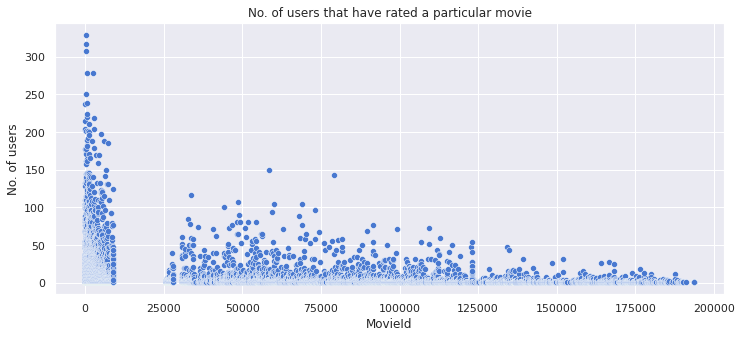

In [ ]:
# This will give us the number of users who have voted for a particular movie
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')

sns.set_palette("muted")
f,ax = plt.subplots(1,1,figsize=(12,5))
sns.scatterplot(no_user_voted.index,no_user_voted)
plt.xlabel('MovieId')
plt.ylabel('No. of users')
plt.title("No. of users that have rated a particular movie")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


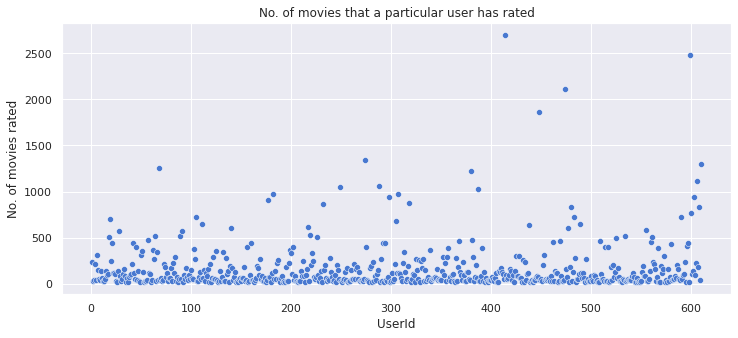

In [ ]:
# This will give us the number of movies a user has rated
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

f,ax = plt.subplots(1,1,figsize=(12,5))
sns.scatterplot(no_movies_voted.index,no_movies_voted)
plt.xlabel('UserId')
plt.ylabel('No. of movies rated')
plt.title("No. of movies that a particular user has rated")
plt.show()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


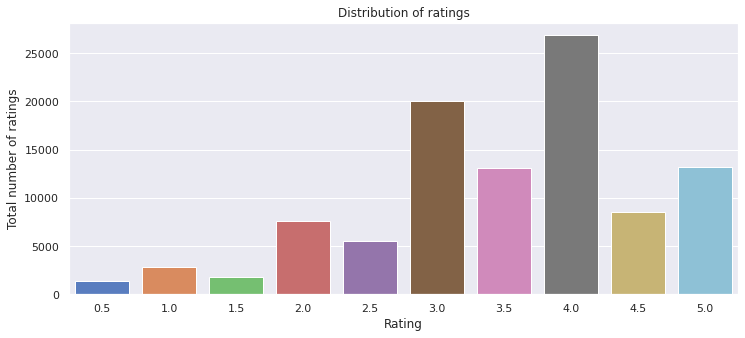

In [ ]:
display(df)

# Plotting the distribution of ratings
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Distribution of ratings')
sns.countplot(ratings['rating'])
ax.set_xlabel("Rating")
ax.set_ylabel("Total number of ratings")
plt.show()

In [ ]:
# We have obtained a dataset of shape (9724,610) after the previous steps. However, 
# most of the values are still zero. We will convert this into a compressed sparse row matrix.
from scipy.sparse import csr_matrix

data = csr_matrix(df.values)
df.reset_index(inplace=True)

display(df)

userId,movieId,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,193587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# To make the movie recommendation model, we will use Nearest Neighbours.
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10, algorithm='auto', n_jobs=-1)
knn.fit(data)

# We will first take a particular movie input movie from the user
# We will then output 10 movies with the most similarities to the input movie.
def recommend(inp):
  movie_list = movies[movies['title'].str.contains(inp)]
  if(len(movie_list)==0):
    print("This movie is not in the database. Try another one!")
    return
  movie_idx= movie_list.iloc[0]['movieId']
  movie_idx = df[df['movieId'] == movie_idx].index[0]
  distances , indices = knn.kneighbors(data[movie_idx],n_neighbors=11)    
  rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
  recommend_frame = []
  for val in rec_movie_indices:
    movie_idx = df.iloc[val[0]]['movieId']
    idx = movies[movies['movieId'] == movie_idx].index
    recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0]})
  recommendations = pd.DataFrame(recommend_frame,index=range(1,11))
  return recommendations

In [ ]:
# Testing the recommendation system
input = "Iron Man"
print("The top ten movies similar to", input, "are -")
recommend(input)

The top ten movies similar to Iron Man are -


,Title
1,Guardians of the Galaxy (2014)
2,Pirates of the Caribbean: At World's End (2007)
3,Star Trek (2009)
4,Kung Fu Panda (2008)
5,X-Men: First Class (2011)
6,Watchmen (2009)
7,Iron Man 3 (2013)
8,Thor (2011)
9,"Avengers, The (2012)"
10,Iron Man 2 (2010)


## **User-User and Item-Item based Collaborative Filtering using Pearson and Cosine Similarity**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ratings = pd.read_csv('/content/ratings.csv')

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
ratings.drop('timestamp', axis = 1, inplace = True)

In [ ]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
# From the ratings dataset, we will create another dataset, where, for each movie, 
# all the ratings given by the 610 users are displayed.
ratings = ratings.pivot(index='movieId',columns='userId',values='rating')

# The NaN values correspond to the users that have not rated a particular movie.
# We will replace them with zeroes to create a sparse matrix.
ratings = ratings.fillna(0)
display(ratings)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Shuffling the data and dividing into train and test sets, where size of
# test set = 0.2
ratings = ratings.sample(frac = 1) 

train_data = ratings[0:7780]
test_data = ratings[7780:]

In [ ]:
print(train_data.shape)
print(test_data.shape)

(7780, 610)
(1944, 610)


In [ ]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.values
test_data_matrix = test_data.values

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(7780, 610)
(1944, 610)


Using Pearson similarity and calculating pairwise distances:

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.         -0.00543965  0.05494779 ... -0.00455948 -0.0055532
  -0.00319287]
 [-0.00543965  1.          0.24273566 ... -0.00784238 -0.00955161
  -0.00549179]
 [ 0.05494779  0.24273566  1.         ...  0.05258294 -0.02864485
  -0.01646964]
 ...
 [-0.00455948 -0.00784238  0.05258294 ...  1.          0.20750852
  -0.00460318]
 [-0.0055532  -0.00955161 -0.02864485 ...  0.20750852  1.
  -0.00560643]
 [-0.00319287 -0.00549179 -0.01646964 ... -0.00460318 -0.00560643
   1.        ]]


In [ ]:
user_correlation.shape

(7780, 7780)

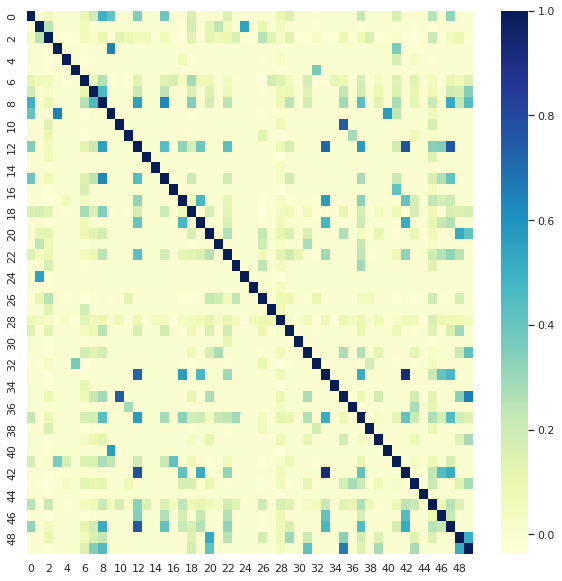

In [ ]:
# Visualization of similarity in user behaviours.
# Darker colour represents that the users are more similar.

import seaborn as sns

user_correlation_reduced = user_correlation[0:50, 0:50]

sns.set(rc={'figure.figsize':(10,10)})

sns.heatmap(user_correlation_reduced, cmap="YlGnBu")


In [ ]:
# Item Similarity Matrix
from sklearn.metrics.pairwise import pairwise_distances

item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.02398492  0.02660815 ...  0.25978636  0.06236689
   0.10438062]
 [ 0.02398492  1.         -0.00256585 ...  0.04023794  0.03116811
   0.10853739]
 [ 0.02660815 -0.00256585  1.         ...  0.01756157 -0.00254188
   0.01938746]
 ...
 [ 0.25978636  0.04023794  0.01756157 ...  1.          0.09791452
   0.25801775]
 [ 0.06236689  0.03116811 -0.00254188 ...  0.09791452  1.
   0.0239666 ]
 [ 0.10438062  0.10853739  0.01938746 ...  0.25801775  0.0239666
   1.        ]]


In [ ]:
item_correlation.shape

(610, 610)

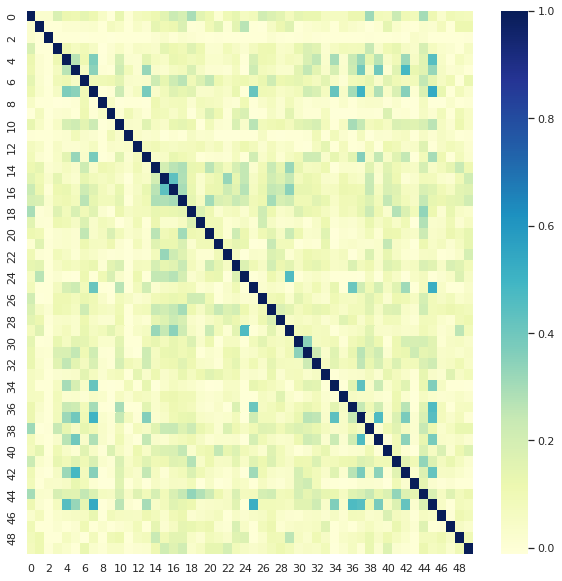

In [ ]:
# Visualization of similarity in movie genres.
# Darker colour represents that the movies are more similar.

item_correaltion_reduced = item_correlation[0:50, 0:50]

sns.set(rc={'figure.figsize':(10,10)})

sns.heatmap(item_correaltion_reduced, cmap="YlGnBu")

In [ ]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):

    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) #np.newaxis is used to add and extra column to store predictions

        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T

    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    
    return pred

Evaluating the model:

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


def rmse(pred, actual):
    
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    
    return sqrt(mean_squared_error(pred, actual))

In [ ]:

user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

print('RMSE for Train data :')

print('User-based CF RMSE: ', rmse(user_prediction, test_data_matrix))
print('Item-based CF RMSE: ', rmse(item_prediction, test_data_matrix))

RMSE for Train data :
User-based CF RMSE:  3.5131860695902675
Item-based CF RMSE:  3.611296642721853


In [ ]:
print('RMSE for Test data :')

print('User-based CF RMSE: ' ,rmse(user_prediction, train_data_matrix))
print('Item-based CF RMSE: ' ,rmse(item_prediction, train_data_matrix))

RMSE for Test data :
User-based CF RMSE:  2.9132953689300702
Item-based CF RMSE:  3.0578252905429837


Using Cosine Similarity:

In [ ]:

# User Similarity Matrix
user_correlation_2 = 1 - pairwise_distances(train_data, metric='cosine')
user_correlation_2[np.isnan(user_correlation_2)] = 0
print(user_correlation_2)

[[1.         0.         0.06833172 ... 0.         0.         0.        ]
 [0.         1.         0.25886524 ... 0.         0.         0.        ]
 [0.06833172 0.25886524 1.         ... 0.07284982 0.         0.        ]
 ...
 [0.         0.         0.07284982 ... 1.         0.21377004 0.        ]
 [0.         0.         0.         ... 0.21377004 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
# Item Similarity Matrix

item_correlation_2 = 1 - pairwise_distances(train_data_matrix.T, metric='cosine')
item_correlation_2[np.isnan(item_correlation_2)] = 0
print(item_correlation_2)

[[1.         0.03239459 0.03296175 ... 0.28850466 0.07019398 0.15022719]
 [0.03239459 1.         0.         ... 0.05456503 0.03437387 0.12184053]
 [0.03296175 0.         1.         ... 0.0290874  0.         0.03388375]
 ...
 [0.28850466 0.05456503 0.0290874  ... 1.         0.10976161 0.3301301 ]
 [0.07019398 0.03437387 0.         ... 0.10976161 1.         0.04276921]
 [0.15022719 0.12184053 0.03388375 ... 0.3301301  0.04276921 1.        ]]


Evaluating the model:

In [ ]:
user_prediction_2 = predict(train_data_matrix, user_correlation_2, type='user')
item_prediction_2 = predict(train_data_matrix, item_correlation_2, type='item')

print('RMSE for Train data :')

print('User-based CF RMSE: ', rmse(user_prediction_2, test_data_matrix))
print('Item-based CF RMSE: ', rmse(item_prediction_2, test_data_matrix))

RMSE for Train data :
User-based CF RMSE:  3.4506987026366818
Item-based CF RMSE:  3.6076763218471997


In [ ]:
print('RMSE for Test data :')

print('User-based CF RMSE: ' ,rmse(user_prediction_2, train_data_matrix))
print('Item-based CF RMSE: ' ,rmse(item_prediction_2, train_data_matrix))

RMSE for Test data :
User-based CF RMSE:  2.889244749347006
Item-based CF RMSE:  3.063923065001518


## **Content Based model using Term Frequency (TF), Inverse Document Frequency (IDF) and Cosine Similarity**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import matplotlib.pyplot as plt


In [ ]:
movies = pd.read_csv('/content/movies.csv')

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Visualizaing the frequency of different words in movie titles:

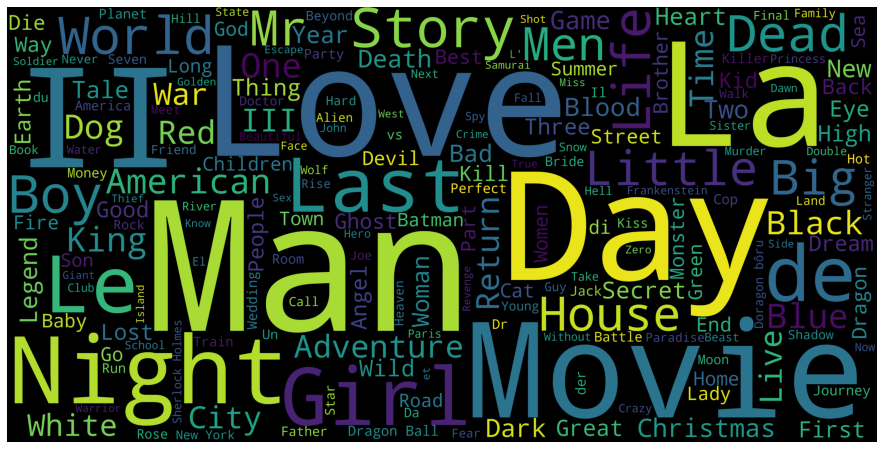

In [ ]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Cleaning the genre column and converting the values to string

movies['genres'] = movies['genres'].str.split('|')

movies['genres'] = movies['genres'].fillna("").astype('str')

movies

,movieId,title,genres
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy..."
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']"
4,5,Father of the Bride Part II (1995),['Comedy']
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"['Action', 'Animation', 'Comedy', 'Fantasy']"
9738,193583,No Game No Life: Zero (2017),"['Animation', 'Comedy', 'Fantasy']"
9739,193585,Flint (2017),['Drama']
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"['Action', 'Animation']"


Visualizaing the frequency of different Genres present in the dataset:

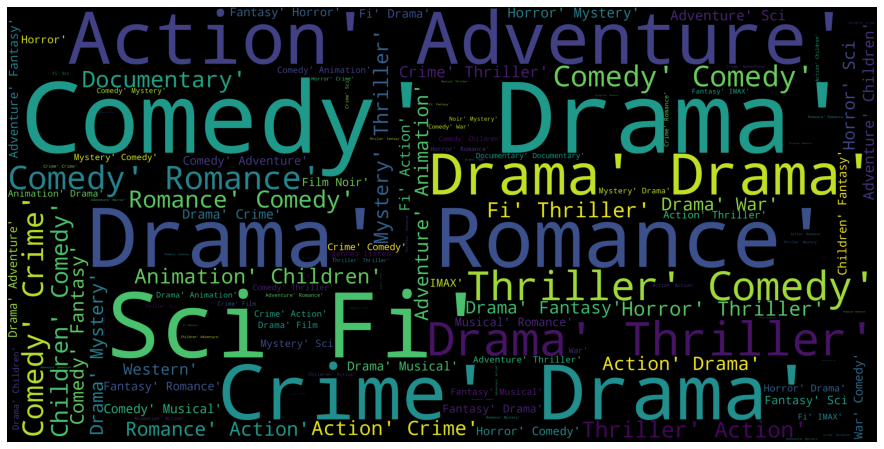

In [ ]:

# Create a wordcloud of the movie genres

title_corpus = ' '.join(movies['genres'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(9742, 177)

In [ ]:

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.31379419, 0.0611029 , ..., 0.        , 0.16123168,
        0.16761358],
       [0.31379419, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0611029 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.36454626],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.16123168, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16761358, 0.        , 0.36454626, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def recommendations_based_on_genre(title):

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]

    return titles.iloc[movie_indices]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


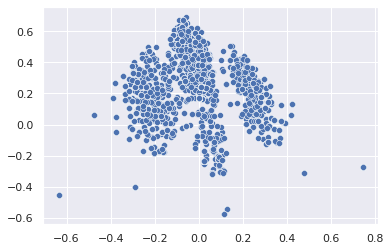

In [ ]:
# Plot to represent all the vectors in 2 dimensions using PCA

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])       

X = pipeline.fit_transform(movies['genres']).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
sns.scatterplot(data2D[:,0], data2D[:,1] )

In [ ]:
recommendations_based_on_genre('Good Will Hunting (1997)').head(10)

24                            Leaving Las Vegas (1995)
27                                   Persuasion (1995)
42                How to Make an American Quilt (1995)
45                        When Night Is Falling (1995)
66                                 Bed of Roses (1996)
75     Once Upon a Time... When We Were Colored (1995)
76                           Angels and Insects (1995)
93               Bridges of Madison County, The (1995)
115                       Up Close and Personal (1996)
151                                    Mad Love (1995)
Name: title, dtype: object

In [ ]:
recommendations_based_on_genre('Jumanji (1995)').head(10)

53                     Indian in the Cupboard, The (1995)
109                     NeverEnding Story III, The (1994)
767                       Escape to Witch Mountain (1975)
1514            Darby O'Gill and the Little People (1959)
1556                                  Return to Oz (1985)
1617                        NeverEnding Story, The (1984)
1618    NeverEnding Story II: The Next Chapter, The (1...
1799                        Santa Claus: The Movie (1985)
3574    Harry Potter and the Sorcerer's Stone (a.k.a. ...
6075    Chronicles of Narnia: The Lion, the Witch and ...
Name: title, dtype: object

In [ ]:
recommendations_based_on_genre('Iron Man (2008)').head(10)

224             Star Wars: Episode IV - A New Hope (1977)
275                                       Stargate (1994)
385                                 Demolition Man (1993)
898     Star Wars: Episode V - The Empire Strikes Back...
911     Star Wars: Episode VI - Return of the Jedi (1983)
1058           Star Trek III: The Search for Spock (1984)
1346                                 Lost in Space (1998)
1557                                Rocketeer, The (1991)
1567                                          Tron (1982)
1692                            Six-String Samurai (1998)
Name: title, dtype: object

# Hybrid Filtering using Linear Regression

In [ ]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())
movies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,movieId,title,genres,year
0,1,Toy Story,"['Adventure', 'Animation', 'Children', 'Comedy...",1995
1,2,Jumanji,"['Adventure', 'Children', 'Fantasy']",1995
2,3,Grumpier Old Men,"['Comedy', 'Romance']",1995
3,4,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']",1995
4,5,Father of the Bride Part II,['Comedy'],1995


In [ ]:
# #Every genre is separated by a | so we simply have to call the split function on |
# movies['genres'] = movies.genres.str.split('|')
# movies.head()

In [ ]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

In [ ]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [ ]:
#Filtering out the movies by title
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [ ]:
#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

In [ ]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
# userGenreTable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

In [ ]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
# userProfile

In [ ]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
# genreTable.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
genreTable.shape

(9742, 38)

In [ ]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.924403
2    0.828912
3    0.640584
4    0.720159
5    0.442971
dtype: float64

In [ ]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

movieId
6902      1.000000
81132     0.988064
148775    0.986737
117646    0.976127
164226    0.973475
dtype: float64

In [ ]:
#The final recommendation table
movies.loc[movies['movieId'].isin(recommendationTable_df.head(10).keys())]

,movieId,title,genres,year
478,546,Super Mario Bros.,"['Action', 'Adventure', 'Children', 'Comedy', ...",1993
2304,3054,Pokémon: The First Movie,"['Adventure', 'Animation', 'Children', 'Fantas...",1998
4348,6350,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,"['Action', 'Adventure', 'Animation', 'Children...",1986
4631,6902,Interstate 60,"['Adventure', 'Comedy', 'Drama', 'Fantasy', 'M...",2002
5533,26590,G.I. Joe: The Movie,"['Action', 'Adventure', 'Animation', 'Children...",1987
5620,27155,"Batman/Superman Movie, The","['Action', 'Adventure', 'Animation', 'Children...",1998
7441,81132,Rubber,"['Action', 'Adventure', 'Comedy', 'Crime', 'Dr...",2010
8597,117646,Dragonheart 2: A New Beginning,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",2000
9169,148775,Wizards of Waverly Place: The Movie,"['Adventure', 'Children', 'Comedy', 'Drama', '...",2009
9394,164226,Maximum Ride,"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",2016
